## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

In [1]:
! git clone https://www.github.com/ds4e/clustering


Cloning into 'clustering'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 30 (delta 2), reused 1 (delta 1), pack-reused 25 (from 1)
Receiving objects: 100% (30/30), 4.72 MiB | 8.28 MiB/s, done.
Resolving deltas: 100% (2/2), done.


**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

Question 1, part 1

In [2]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

Question 1, part 2

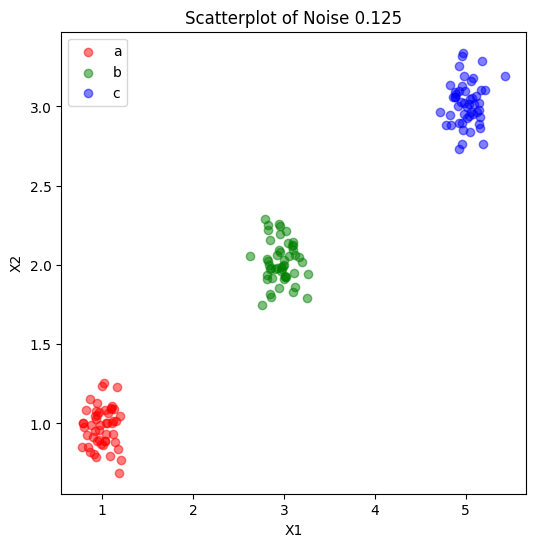

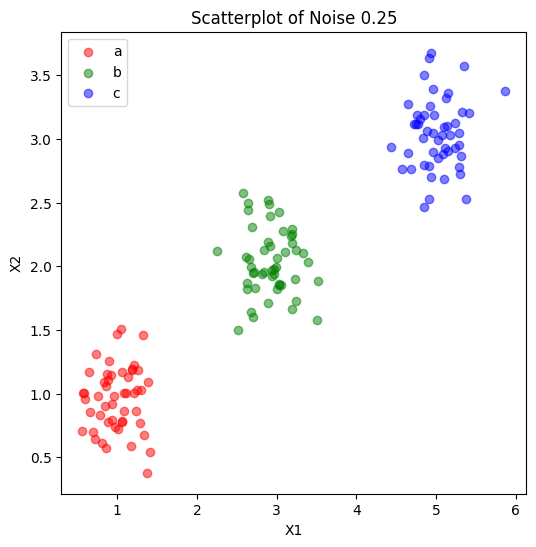

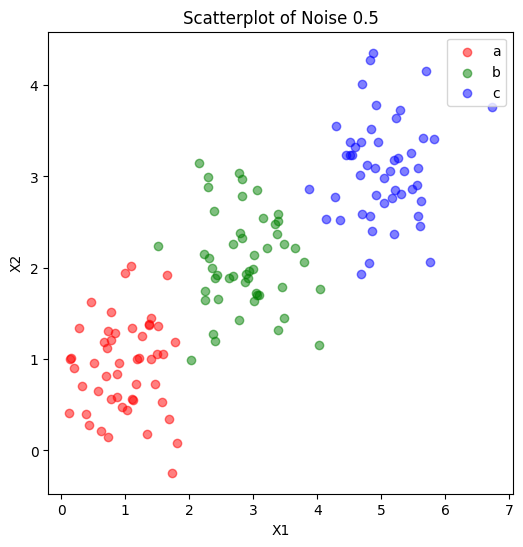

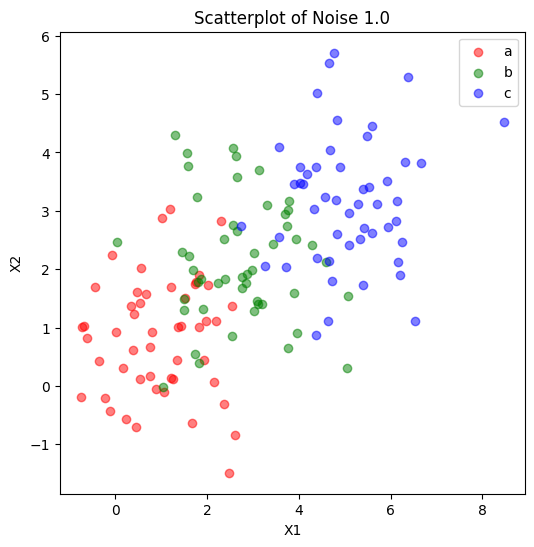

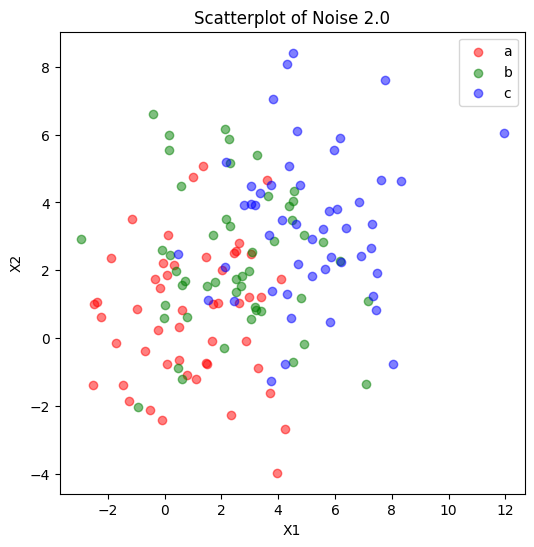

In [3]:
import matplotlib.pyplot as plt

# Function to create scatterplot for each dataset
def plot_scatter(df, title):
    plt.figure(figsize=(6, 6))
    for label, color in zip(df['group'].unique(), ['r', 'g', 'b']):
        subset = df[df['group'] == label]
        plt.scatter(subset['x1'], subset['x2'], label=label, c=color, alpha=0.5)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)
    plt.legend()
    plt.show()

# Datasets with different noise levels
datasets = {
    'Noise 0.125': df0_125,
    'Noise 0.25': df0_25,
    'Noise 0.5': df0_5,
    'Noise 1.0': df1_0,
    'Noise 2.0': df2_0
}

# Scatterplots for each dataset
for title, df in datasets.items():
    plot_scatter(df, f'Scatterplot of {title}')

Question 1, part 3

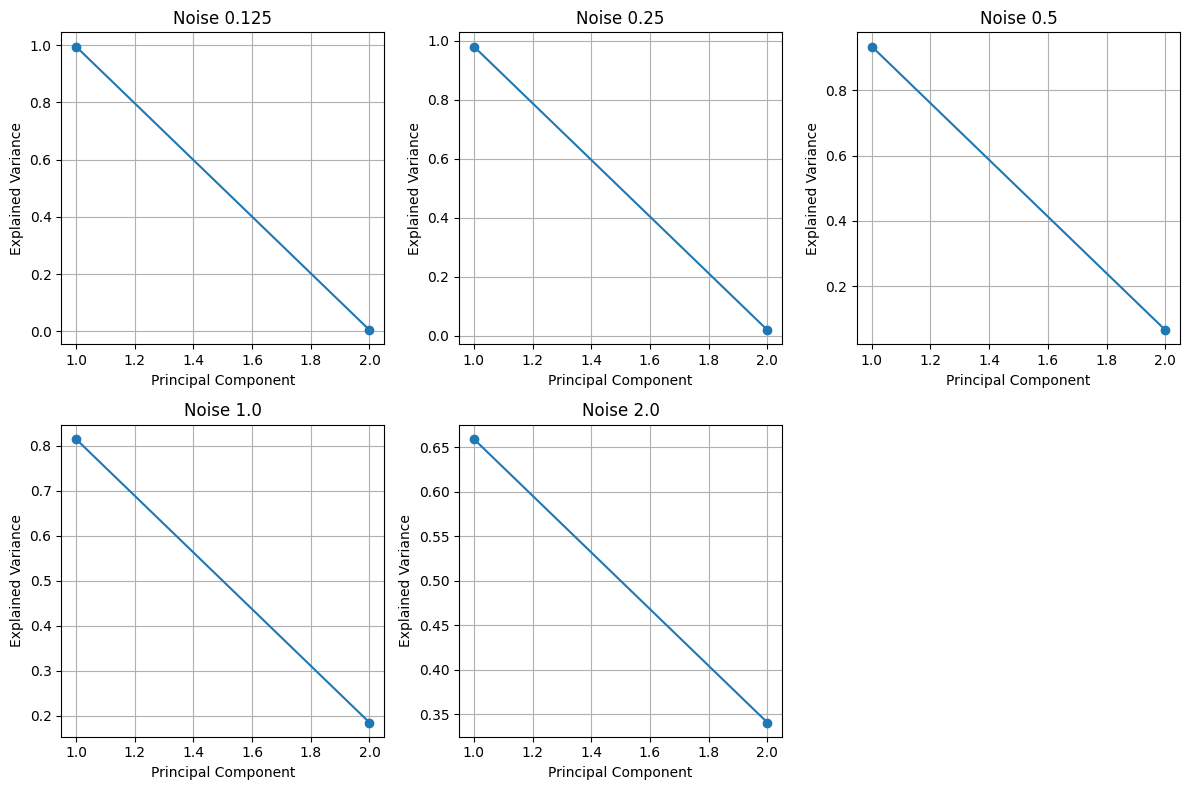

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to create scree plot for each dataset using PCA
def plot_scree(df, title):
    pca = PCA()
    pca.fit(df[['x1', 'x2']])
    explained_variance = pca.explained_variance_ratio_
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance')
    plt.title(title)
    plt.grid(True)

# Datasets with different noise levels
datasets = {
    'Noise 0.125': df0_125,
    'Noise 0.25': df0_25,
    'Noise 0.5': df0_5,
    'Noise 1.0': df1_0,
    'Noise 2.0': df2_0
}

# Scree plots for each dataset
plt.figure(figsize=(12, 8))
for idx, (title, df) in enumerate(datasets.items()):
    plt.subplot(2, 3, idx + 1)
    plot_scree(df, title)
plt.tight_layout()
plt.show()


Question 1, part 4

The "elbow" in a scree plot represents the point where the explained variance from each additional principal component begins to level off. It helps determine the optimal number of components to keep, as you want to retain the components that explain the most meaningful variance in the data. In your simulation, at lower noise levels (e.g., 0.125), the elbow is clear because the data is well-structured, and the first few components capture most of the variance. As noise increases (e.g., 2.0), the variance becomes more evenly spread across components, making the elbow less distinct and making it harder to select the optimal number of components.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

Question 2, part 1

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the CSV file into a DataFrame
df = pd.read_csv('/content/clustering/assignment/data/2022 election cycle fundraising.csv')

print(df.head())
df.shape

   index              Member       Party       State Chamber       Raised  \
0      0  Abigail Spanberger  Democratic    Virginia   House   $7,719,396   
1      1      Adam Kinzinger  Republican    Illinois   House   $2,192,741   
2      2         Adam Schiff  Democratic  California   House  $20,993,041   
3      3          Adam Smith  Democratic  Washington   House   $1,211,111   
4      4        Adrian Smith  Republican    Nebraska   House   $1,617,611   

         Spent Cash on Hand Debts  
0   $7,449,678     $851,851    $0  
1   $1,243,502   $2,472,888    $0  
2  $13,957,854  $20,942,888    $0  
3   $1,173,466     $623,472    $0  
4   $1,664,674   $1,098,579    $0  


(537, 9)

In [6]:
# Clean the dollar-denominated columns
columns_to_clean = ['Raised', 'Spent', 'Cash on Hand', 'Debts']

for column in columns_to_clean:
    # Remove dollar signs and commas
    df[column] = df[column].replace({'\$': '', ',': ''}, regex=True)

    # Convert to numeric, invalid parsing will result in NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # Handle missing or invalid values (e.g., replace NaN with 0 or appropriate value)
    df[column] = df[column].fillna(0)  # You can choose another strategy, such as using the mean or median

# Verify the cleaned columns
print(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']].head())

     Raised     Spent  Cash on Hand  Debts
0   7719396   7449678        851851      0
1   2192741   1243502       2472888      0
2  20993041  13957854      20942888      0
3   1211111   1173466        623472      0
4   1617611   1664674       1098579      0


Question 2, part 2

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'Raised' and 'Spent' columns
df[['Raised', 'Spent']] = scaler.fit_transform(df[['Raised', 'Spent']])

# Check the first few rows after normalization
print(df[['Raised', 'Spent']].head())

     Raised     Spent
0  0.103512  0.098074
1  0.040686  0.016371
2  0.254404  0.183753
3  0.029527  0.015449
4  0.034148  0.021915


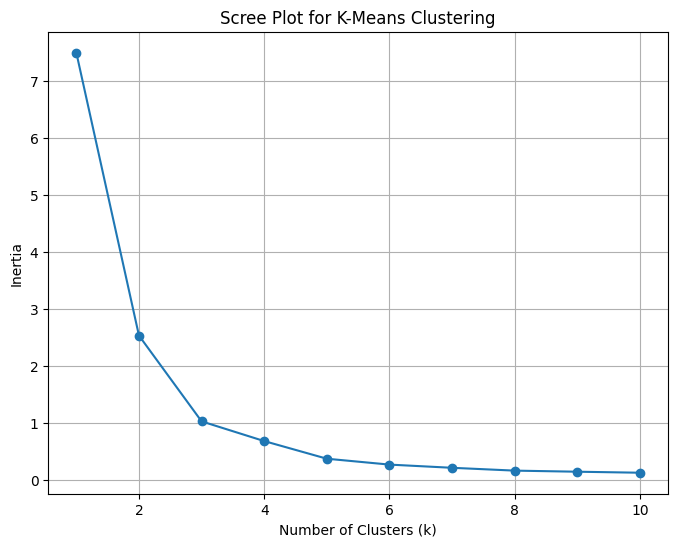

In [8]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia = []

# Try different k values (1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Raised', 'Spent']])
    inertia.append(kmeans.inertia_)

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Scree Plot for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


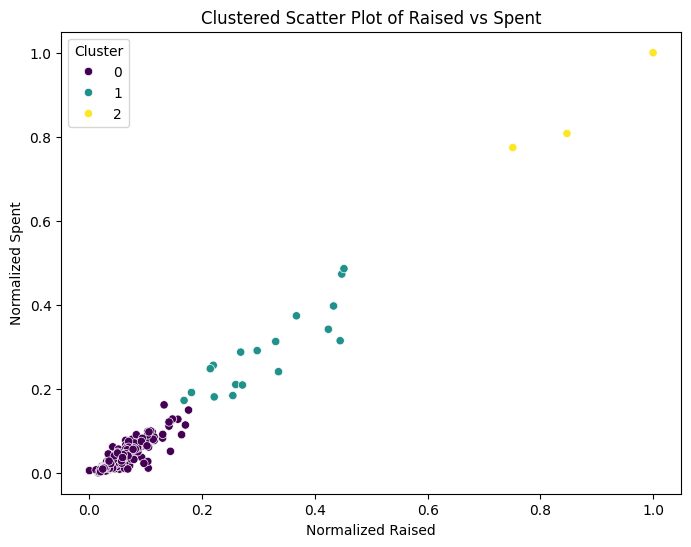

In [9]:
# Apply K-Means with the optimal k (for example, k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Raised', 'Spent']])

# Scatter plot of Raised vs Spent with cluster labels as hue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Raised', y='Spent', hue='Cluster', palette='viridis')
plt.title('Clustered Scatter Plot of Raised vs Spent')
plt.xlabel('Normalized Raised')
plt.ylabel('Normalized Spent')
plt.legend(title='Cluster')
plt.show()

In [11]:
# Count the number of politicians in each cluster
cluster_counts = df['Cluster'].value_counts()

# Display the smallest two clusters
smallest_clusters = cluster_counts.nsmallest(2)
print("Smallest two clusters:")
print(smallest_clusters)

# Identify the politicians in the smallest two clusters
smallest_cluster_1 = df[df['Cluster'] == smallest_clusters.index[0]]
smallest_cluster_2 = df[df['Cluster'] == smallest_clusters.index[1]]

# Display the names or other identifiers of the politicians in the smallest clusters
print("Politicians in smallest cluster 1:")
print(smallest_cluster_1[['Member', 'Raised', 'Spent']])

print("Politicians in smallest cluster 2:")
print(smallest_cluster_2[['Member', 'Raised', 'Spent']])

Smallest two clusters:
Cluster
2     3
1    18
Name: count, dtype: int64
Politicians in smallest cluster 1:
              Member    Raised     Spent
340       Mark Kelly  0.847210  0.807760
417  Raphael Warnock  1.000000  1.000000
523      Val Demings  0.751061  0.774181
Politicians in smallest cluster 2:
                     Member    Raised     Spent
2               Adam Schiff  0.254404  0.183753
87   Catherine Cortez Masto  0.447666  0.472999
89            Chuck Schumer  0.423863  0.341554
115            Dan Crenshaw  0.181001  0.191054
261            John Kennedy  0.335412  0.240608
290            Katie Porter  0.259505  0.209938
298          Kevin McCarthy  0.297585  0.290764
326           Maggie Hassan  0.367193  0.373632
328             Marco Rubio  0.433063  0.396961
357          Michael Bennet  0.221362  0.180538
390            Nancy Pelosi  0.268313  0.287187
402            Patty Murray  0.167830  0.172107
414               Rand Paul  0.271429  0.208861
442             Ron J

Question 2, part 3

In [12]:
# Normalize the 'Cash on Hand' and 'Debts' columns
df[['Cash on Hand', 'Debts']] = scaler.fit_transform(df[['Cash on Hand', 'Debts']])

# Check the first few rows after normalization
print(df[['Cash on Hand', 'Debts']].head())


   Cash on Hand  Debts
0      0.040154    0.0
1      0.111166    0.0
2      0.920268    0.0
3      0.030150    0.0
4      0.050962    0.0


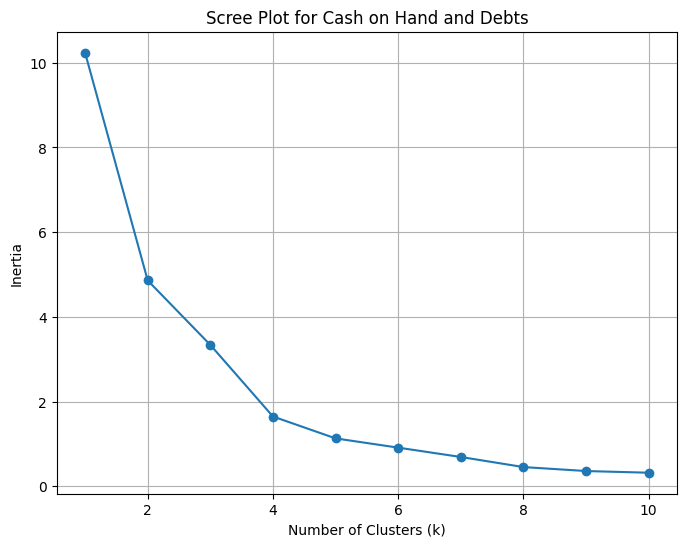

In [13]:
# Create an empty list to store the inertia values for clustering Cash on Hand and Debts
inertia_cash_debts = []

# Try different k values (1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Cash on Hand', 'Debts']])
    inertia_cash_debts.append(kmeans.inertia_)

# Plot the scree plot for Cash on Hand and Debts
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_cash_debts, marker='o')
plt.title('Scree Plot for Cash on Hand and Debts')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


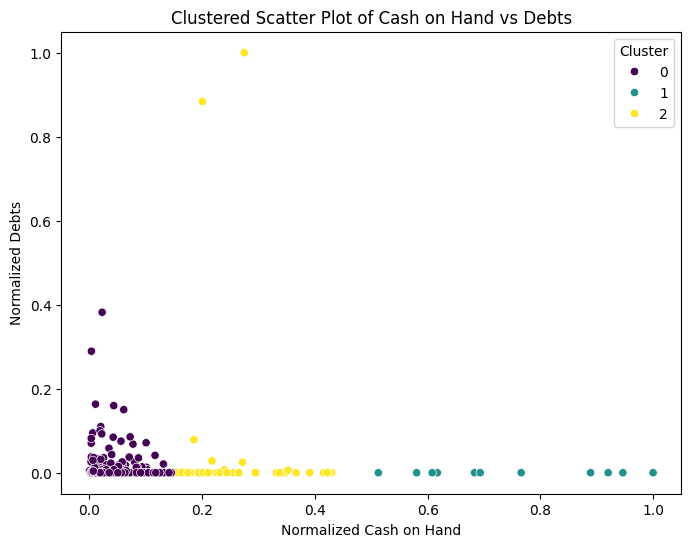

In [14]:
# Apply K-Means with the optimal k (for example, k=3 based on the scree plot)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_Cash_Debts'] = kmeans.fit_predict(df[['Cash on Hand', 'Debts']])

# Scatter plot of Cash on Hand vs Debts with cluster labels as hue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='Cluster_Cash_Debts', palette='viridis')
plt.title('Clustered Scatter Plot of Cash on Hand vs Debts')
plt.xlabel('Normalized Cash on Hand')
plt.ylabel('Normalized Debts')
plt.legend(title='Cluster')
plt.show()


In [15]:
# Count the number of politicians in each cluster for Cash on Hand and Debts
cluster_counts_cash_debts = df['Cluster_Cash_Debts'].value_counts()

# Display the smallest two clusters
smallest_clusters_cash_debts = cluster_counts_cash_debts.nsmallest(2)
print("Smallest two clusters for Cash on Hand and Debts:")
print(smallest_clusters_cash_debts)

# Identify the politicians in the smallest two clusters
smallest_cluster_1_cd = df[df['Cluster_Cash_Debts'] == smallest_clusters_cash_debts.index[0]]
smallest_cluster_2_cd = df[df['Cluster_Cash_Debts'] == smallest_clusters_cash_debts.index[1]]

# Display the names or other identifiers of the politicians in the smallest clusters
print("Politicians in smallest cluster 1 (Cash on Hand and Debts):")
print(smallest_cluster_1_cd[['Member', 'Cash on Hand', 'Debts']])

print("Politicians in smallest cluster 2 (Cash on Hand and Debts):")
print(smallest_cluster_2_cd[['Member', 'Cash on Hand', 'Debts']])


Smallest two clusters for Cash on Hand and Debts:
Cluster_Cash_Debts
1    11
2    50
Name: count, dtype: int64
Politicians in smallest cluster 1 (Cash on Hand and Debts):
                  Member  Cash on Hand  Debts
2            Adam Schiff      0.920268    0.0
89         Chuck Schumer      0.889092    0.0
261         John Kennedy      0.683153    0.0
267           John Thune      0.765940    0.0
274      Josh Gottheimer      0.617185    0.0
290         Katie Porter      0.693338    0.0
310       Lindsey Graham      0.608044    0.0
340           Mark Kelly      0.580473    0.0
412  Raja Krishnamoorthi      0.512454    0.0
417      Raphael Warnock      1.000000    0.0
500            Tim Scott      0.946418    0.0
Politicians in smallest cluster 2 (Cash on Hand and Debts):
                       Member  Cash on Hand     Debts
11               Alex Padilla      0.336539  0.000429
12   Alexandria Ocasio-Cortez      0.263067  0.000000
45             Bernie Sanders      0.429999  0.000000
4

Question 2, part 4

In [16]:
# Normalize the 'Raised', 'Spent', 'Cash on Hand', and 'Debts' columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Raised', 'Spent', 'Cash on Hand', 'Debts']] = scaler.fit_transform(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']])

# Check the first few rows after normalization
print(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']].head())


     Raised     Spent  Cash on Hand  Debts
0  0.103512  0.098074      0.040154    0.0
1  0.040686  0.016371      0.111166    0.0
2  0.254404  0.183753      0.920268    0.0
3  0.029527  0.015449      0.030150    0.0
4  0.034148  0.021915      0.050962    0.0


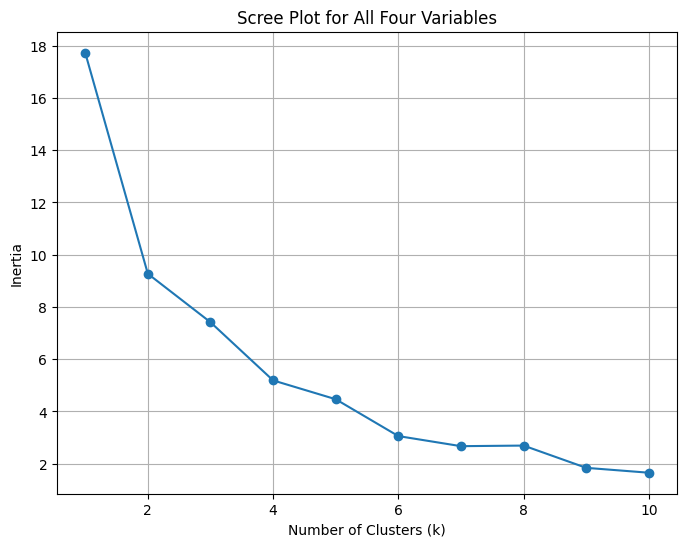

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values for clustering with all four variables
inertia_all_vars = []

# Try different k values (1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']])
    inertia_all_vars.append(kmeans.inertia_)

# Plot the scree plot for all four variables
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_all_vars, marker='o')
plt.title('Scree Plot for All Four Variables')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


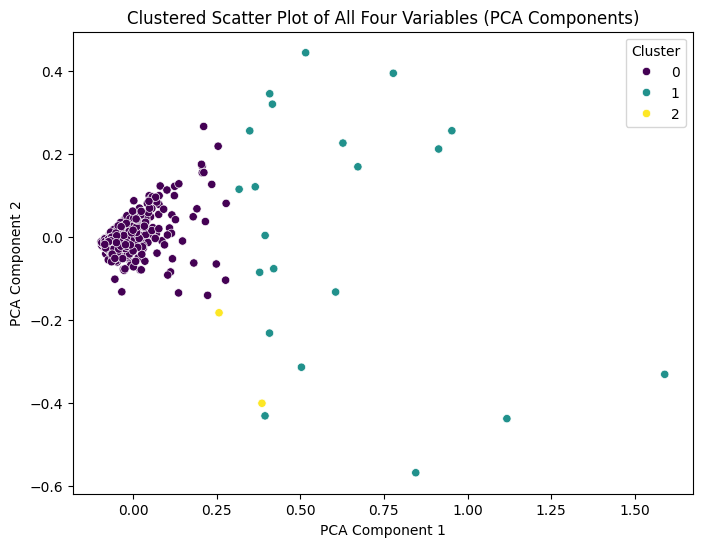

In [18]:
from sklearn.decomposition import PCA
import seaborn as sns

# Apply K-Means with the optimal k (for example, k=3 from the scree plot)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']])

# Reduce the dimensions to 2 using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']])

# Add the PCA components to the dataframe
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Scatter plot of PCA components with cluster labels as hue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Clustered Scatter Plot of All Four Variables (PCA Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


Observations: We used K-Means clustering with all four variables: Raised, Spent, Cash on Hand, and Debts. First, we normalized the data, then ran K-Means to find the best number of clusters using a scree plot. We visualized the results by reducing the data to two dimensions with PCA and plotted the clusters. Comparing this with the previous clusters (based on Raised & Spent or Cash on Hand & Debts), we got a clearer picture of how candidates manage their finances overall. This helped identify patterns in their fundraising, spending, and financial health, giving insights into how they might perform in the election.

Question 2, part 5

K-Means clustering with all four numeric variables provides insights into how candidates manage their resources, revealing financial strategies like focusing on grassroots support or investing in media outreach. It also shows the viability of campaigns by grouping candidates with similar financial situations, such as those with high debt and low cash reserves or those with ample cash but little spending. While K-Means helps identify patterns in financial behavior, it doesn't directly link these patterns to electoral success. To predict outcomes, you'd need to combine financial data with other factors like polling and demographics. Overall, K-Means offers useful financial insights, but a more complete analysis is needed to understand its impact on elections.

Ack: I used ChatGPT to help me with parts of this assignment